# Scripts used to analyse data

In [1]:
#Imports
from collections import defaultdict
from collections import OrderedDict
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import data finction
def getfile(name):
    tempdict = {}
    with open(name) as f:
            for line in f:
                line = line.replace('\n', '')
                line = line.split(";")
                tempdict[line[0]] = float(line[1])
    od = collections.OrderedDict(sorted(tempdict.items(), key=lambda x:int(x[0])))
    #print len(tempdict) #for possible debugging
    return od

In [3]:
#Get mean(average) function

#add together
def dsum(*dicts):
    ret = defaultdict(int)
    for d in dicts:
        for e in d:
            for k, v in e.items():
                ret[k] += v
    return dict(ret)

#mean function
def getmean(files):
    amount = len(files)
    finaldict1 = dsum(files) #raw data
    finallist2 = [] #average
    for i in finaldict1:
        finallist2.append(finaldict1[i] / amount)
    return finallist2
    

In [4]:
#Get median
def getmedian(files):
    medianlist = []
    for i1 in range(36): #Change for other files
        temp = []
        for i2 in files:
            temp.append(i2.values()[i1])
        medianlist.append(np.median(temp))
    return medianlist

## Data analysis

In [5]:
#quick and dirty way
g01 = getfile("rawdata\\2015-11-04andre")
g02 = getfile("rawdata\\2015-11-04jose")
g03 = getfile("rawdata\\2015-11-04mike")
g04 = getfile("rawdata\\2015-11-04trevon")
g05 = getfile("rawdata\\2015-11-06g1")
g06 = getfile("rawdata\\2015-11-06g2")
g07 = getfile("rawdata\\2015-11-06g3")
g08 = getfile("rawdata\\2015-11-06g4")
g09 = getfile("rawdata\\2015-11-06g5")
g10 = getfile("rawdata\\2015-11-06g6")
g11 = getfile("rawdata\\2015-11-11g7")
g12 = getfile("rawdata\\2015-11-11g8")
g13 = getfile("rawdata\\2015-11-11g9")
g14 = getfile("rawdata\\2015-11-11thomas")
p1 = getfile("rawdata\\pat1")
p2 = getfile("rawdata\\pat2")
p3 = getfile("rawdata\\pat3")
p4 = getfile("rawdata\\pat4")
p5 = getfile("rawdata\\pat5")

In [6]:
total = [g01,g02,g03,g04,g05,g06,g07,g08,g09,g10,g11,g12,g13,g14, p1]
patrick = [p1,p2,p3,p4,p5]

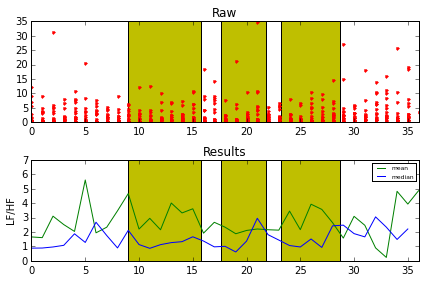

In [7]:
%matplotlib inline
#GENERAL

plt.figure(1)

plt.subplot(211)

#all dots
for i in total:
    temp = []
    for i2 in i:
        temp.append(i[i2])
    plt.plot(temp, 'r.')
    
plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)
    
plt.xlim((0,36))
plt.title('Raw')
plt.subplot(212)

#average
line_one, = plt.plot(getmean(total), 'g', label = 'mean')
line_two, = plt.plot(getmedian(total), 'b', label = 'median')

plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Results')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_one, line_two],prop={'size':6})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)


plt.tight_layout()

plt.savefig('graph1.png', dpi=500, transparent=True)

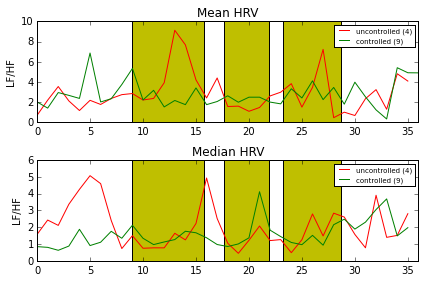

In [8]:
%matplotlib inline
#CONTROLLED VS UNCONTROLLED

first = [g01,g02,g03,g04]
second = [g05,g06,g07,g08,g09,g10,g11,g12,g13,g14,p1]

plt.figure(1)

plt.subplot(211)

#average
line_one1, = plt.plot(getmean(first), 'r', label = 'uncontrolled (4)')
line_two1, = plt.plot(getmean(second), 'g', label = 'controlled (9)')

#plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Mean HRV')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_one1, line_two1],prop={'size':7})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)

plt.subplot(212)

#average
line_one2, = plt.plot(getmedian(first), 'r', label = 'uncontrolled (4)')
line_two2, = plt.plot(getmedian(second), 'g', label = 'controlled (9)')

#plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Median HRV')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_one2, line_two2],prop={'size':7})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)

plt.tight_layout()

plt.savefig('graph2.png', dpi=500, transparent=True)

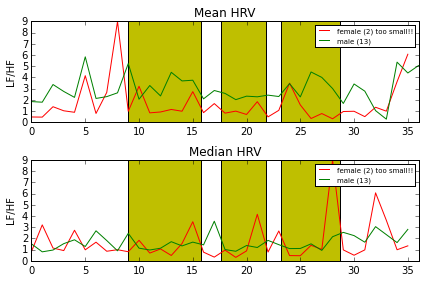

In [9]:
#########Remove. Too small sample
%matplotlib inline
#MALE VS FEMALE

first = [g04,g08]
second = [g01,g02,g03,g05,g06,g07,g09,g10,g11,g12,g13,g14,p1]

plt.figure(1)

plt.subplot(211)

#average
line_one1, = plt.plot(getmean(first), 'r', label = 'female (2) too small!!')
line_two1, = plt.plot(getmean(second), 'g', label = 'male (13)')

#plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Mean HRV')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_one1, line_two1],prop={'size':7})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)

plt.subplot(212)

#average
line_one2, = plt.plot(getmedian(first), 'r', label = 'female (2) too small!!')
line_two2, = plt.plot(getmedian(second), 'g', label = 'male (13)')

#plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Median HRV')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_one2, line_two2],prop={'size':7})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)

plt.tight_layout()

plt.savefig('graph3.png', dpi=500, transparent=True)

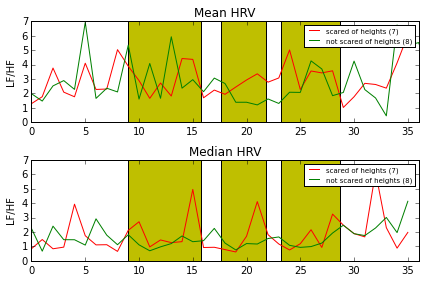

In [10]:
%matplotlib inline
#SCARED OF HEIGHTS OR NOT *ARGUABLE

first = [g01,g04,g05,g08,g09,g10,p1]
second = [g02,g03,g06,g07,g11,g12,g13,g14]

plt.figure(1)

plt.subplot(211)

#average
line_one1, = plt.plot(getmean(first), 'r', label = 'scared of heights (7)')
line_two1, = plt.plot(getmean(second), 'g', label = 'not scared of heights (8)')

#plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Mean HRV')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_one1, line_two1],prop={'size':7})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)

plt.subplot(212)

#average
line_one2, = plt.plot(getmedian(first), 'r', label = 'scared of heights (7)')
line_two2, = plt.plot(getmedian(second), 'g', label = 'not scared of heights (8)')

#plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Median HRV')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_one2, line_two2],prop={'size':7})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)

plt.tight_layout()

plt.savefig('graph4.png', dpi=500, transparent=True)

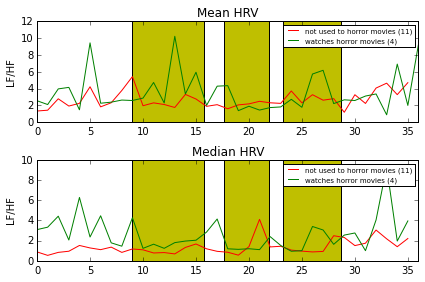

In [11]:
%matplotlib inline
#WATCHES HORROR MOVIES VS NOT

first = [g01,g02,g04,g05,g07,g08,g09,g12,g13,g14,p1]
second = [g03,g06,g10,g11]

plt.figure(1)

plt.subplot(211)

#average
line_one1, = plt.plot(getmean(first), 'r', label = 'not used to horror movies (11)')
line_two1, = plt.plot(getmean(second), 'g', label = 'watches horror movies (4)')

#plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Mean HRV')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_one1, line_two1],prop={'size':7})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)

plt.subplot(212)

#average
line_one2, = plt.plot(getmedian(first), 'r', label = 'not used to horror movies (11)')
line_two2, = plt.plot(getmedian(second), 'g', label = 'watches horror movies (4)')

#plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Median HRV')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_one2, line_two2],prop={'size':7})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)

plt.tight_layout()

plt.savefig('graph5.png', dpi=500, transparent=True)

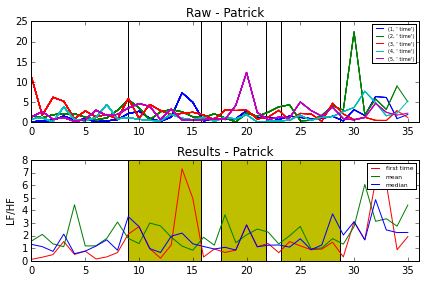

In [12]:
%matplotlib inline
#PATRICK

plt.figure(1)

plt.subplot(211)

#all dots
#b: blue, g: green, r: red, c: cyan, m: magenta, 
#y: yellow, k: black, w: white
coloring = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
colornum = 0

for i in patrick:
    temp = []
    for i2 in i:
        temp.append(i[i2])
        labeltxt = colornum+1, ' time'
        plt.plot(temp, coloring[colornum], label = labeltxt)
    colornum = colornum + 1
    
plt.axvspan(9, 15.8, facecolor='w', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='w', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='w', alpha=1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1, 1),prop={'size':5})
    
plt.xlim((0,36))
plt.title('Raw - Patrick')
plt.subplot(212)

firstone = []
for i in p1:
    firstone.append(p1[i])
line_zero, = plt.plot(firstone, 'r', label = 'first time')
line_one, = plt.plot(getmean(patrick), 'g', label = 'mean')
line_two, = plt.plot(getmedian(patrick), 'b', label = 'median')

#plt.ylim((0,7))
plt.xlim((0,36))

plt.title('Results - Patrick')
plt.legend(bbox_to_anchor=(1, 1), handles=[line_zero, line_one, line_two],prop={'size':6})
plt.ylabel('LF/HF')

plt.axvspan(9, 15.8, facecolor='y', alpha=1)
plt.axvspan(17.6, 21.85, facecolor='y', alpha=1)
plt.axvspan(23.25, 28.7, facecolor='y', alpha=1)

plt.tight_layout()

plt.savefig('graph6.png', dpi=500, transparent=True)